## Importing libraries

In [38]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from xgboost import XGBRegressor 

## preprocessing data

In [3]:
df_train = pd.read_csv("../input/XGBoost-dataset/HousePricesAdvancedRegressionTechniques/train.csv",
                      na_values=['na', '--'])
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# drop ID columns
df_train.drop("Id", axis=1, inplace=True)
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
columns = df_train.columns
columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
# Fill missing values
for i in columns:
    if df_train[i].isnull().values.any():
        if df_train[i].dtype == "object":
            df_train[i] = df_train[i].str.upper().str.strip()
            df_train[i].fillna(df_train[i].mode()[0], inplace = True)
        else:
            df_train[i].fillna(df_train[i].mean(), inplace = True)

In [8]:
print(df_train.isnull().sum().sum())

0


In [9]:
# Encoding Object columns
for i in columns:
    if df_train[i].dtype == "object":
        df_train[i] = df_train[i].astype("category")
        df_train[i] = df_train[i].cat.codes

In [10]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,2,2,2,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,2,2,2,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,2,2,2,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,2,2,2,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,2,2,2,0,12,2008,8,4,250000


In [11]:
# Separate X and Y values
# We are going to predict Sale Price, so SalePrice column is Y
X = df_train.drop("SalePrice", axis=1)
Y = df_train.SalePrice

print(X.shape)
print(Y.shape)

(1460, 79)
(1460,)


In [12]:
# Normalize data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [13]:
# Separate train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("Y_train shape: {}".format(Y_train.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (1168, 79)
X_test shape: (292, 79)
Y_train shape: (1168,)
Y_test shape: (292,)


## XGBoost model

In [14]:
# Build the model
model = XGBRegressor(n_estimators = 1000,
                     max_depth = 5,
                     learning_rate= 0.008,
                     objective='reg:squarederror',
                     min_child_weight = 7,
                    random_state=42)
model.fit(X_train, Y_train, early_stopping_rounds = 10,
         eval_set = [(X_test, Y_test)], verbose = False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.008, max_delta_step=0, max_depth=5,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
# Make a prediction
y_pred = model.predict(X_test)

In [16]:
# Evaluate model
accuracy = mean_squared_error(Y_test, y_pred)
print("MSE:{}".format(accuracy))

MSE:725749651.1572329


In [17]:
score = model.score(X_test, Y_test)
print(score)

0.9053821660834708


In [31]:
# Plot original and prediction values

def plotting(y_test, y_pred):
    new_df = pd.DataFrame(columns=["Actual", "Prediction"])
    new_df["Actual"] = y_test
    new_df["Prediction"] = y_pred
    new_df = new_df.sort_values("Actual")
    new_df = new_df.reset_index(drop=True)
    
    plt.plot("Actual", data = new_df, color = "k", marker = "", label = "Original")
    plt.plot("Prediction", data = new_df, color = "r", marker = "", label = "predicted")
    plt.title("Original and Predicted")
    plt.show

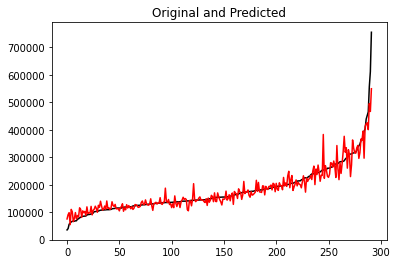

In [32]:
plotting(Y_test, y_pred)

## Decision Tree Model

In [34]:
DT_model = DecisionTreeRegressor(max_depth=3)
DT_model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [35]:
y_pred_DT = DT_model.predict(X_test)

In [65]:
print("MSE: ", mean_squared_error(Y_test, y_pred_DT))
print("R2: ", DT_model.score(X_test,Y_test))

MSE:  1703158143.825071
R2:  0.7779549268414158


In [62]:
score = cross_val_score(DT_model, X, Y, cv=10)
print(score)
print(np.mean(score))

[0.66136984 0.72979911 0.79745952 0.68683804 0.75769675 0.70777862
 0.67043595 0.67999778 0.64251455 0.66390034]
0.699779049915121


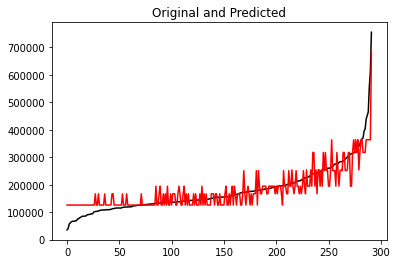

In [68]:
plotting(Y_test, y_pred_DT)

## Random Forest Model

In [63]:
RF_model = RandomForestRegressor(n_estimators=300)
RF_model.fit(X_train, Y_train)
y_pred_RF = RF_model.predict(X_test)

In [64]:
print("MSE:", mean_squared_error(Y_test, y_pred_RF))
print("R2: ", RF_model.score(X_test,Y_test))

MSE: 798875414.462568
R2:  0.8958485737263666


In [66]:
r = cross_val_score(RF_model, X, Y, cv=10)
np.mean(r)

0.8655440934810482

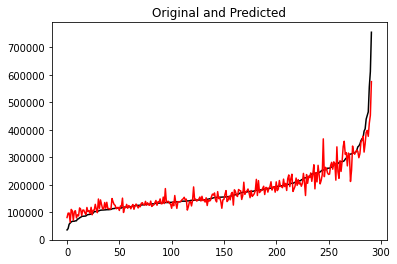

In [69]:
plotting(Y_test, y_pred_RF)